# Machine Learning Assignment 2 - Classification Models

## 1. Install Dependencies

In [1]:
# Install xgboost if not already installed
import subprocess, sys
subprocess.check_call([sys.executable, "-m", "pip", "install", "xgboost", "-q"])
print("xgboost ready")

xgboost ready


## 2. Import Required Libraries

In [2]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

from utils.ml_utils import preprocess_data, initialize_models, calculate_all_metrics

warnings.filterwarnings('ignore')
print("All libraries imported successfully!")

All libraries imported successfully!


## 3. Configuration

In [3]:
# ========== CONFIGURATION ==========
CSV_PATH     = '../input/wine_quality_red.csv'
TARGET_COLUMN = 'quality'
RANDOM_STATE  = 42
TEST_SIZE     = 0.2
OUTPUT_DIR    = '../output'
# ====================================

os.makedirs(OUTPUT_DIR, exist_ok=True)
print(f"Output directory: {OUTPUT_DIR}")

Output directory: ../output


## 4. Load Dataset

In [4]:
print(f"Loading dataset from: {CSV_PATH}")
df = pd.read_csv(CSV_PATH)
df.dropna(inplace=True)

print(f"\n{'='*60}")
print("DATASET INFORMATION")
print(f"{'='*60}")
print(f"Shape: {df.shape}")
print(f"Number of Features: {df.shape[1]}")
print(f"Number of Instances: {df.shape[0]}")
print(f"\nMinimum 12 features: {'PASSED' if df.shape[1] >= 12 else 'FAILED'}")
print(f"Minimum 500 instances: {'PASSED' if df.shape[0] >= 500 else 'FAILED'}")

print("\nFirst 5 rows:")
display(df.head())

print(f"\nTarget Variable Distribution:")
print(df[TARGET_COLUMN].value_counts())

Loading dataset from: ../input/wine_quality_red.csv

DATASET INFORMATION
Shape: (1599, 12)
Number of Features: 12
Number of Instances: 1599

Minimum 12 features: PASSED
Minimum 500 instances: PASSED

First 5 rows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



Target Variable Distribution:
quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


## 5. Data Preprocessing

In [5]:
print("Starting data preprocessing...\n")

X, y, label_encoder = preprocess_data(df, TARGET_COLUMN)

print(f"Preprocessing complete!")
print(f"Final feature matrix shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Target classes: {label_encoder.classes_}")

Starting data preprocessing...

Preprocessing complete!
Final feature matrix shape: (1599, 11)
Number of classes: 6
Target classes: [3 4 5 6 7 8]


## 6. Train-Test Split & Feature Scaling

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print(f"Training set : {X_train_scaled.shape}")
print(f"Test set     : {X_test_scaled.shape}")
print(f"Class balance (train): {np.bincount(y_train)}")

Training set : (1279, 11)
Test set     : (320, 11)
Class balance (train): [  8  42 545 510 159  15]


## 7. Initialize All 6 Models

In [7]:
print("Initializing all 6 classification models...\n")

models = initialize_models(RANDOM_STATE)

print("Models initialized:")
for i, model_name in enumerate(models.keys(), 1):
    print(f"   {i}. {model_name}")

Initializing all 6 classification models...

Models initialized:
   1. Logistic Regression
   2. Decision Tree
   3. K-Nearest Neighbors
   4. Naive Bayes
   5. Random Forest
   6. XGBoost


## 8. Train All Models & Calculate Metrics

In [8]:
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...", end=' ')
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled) if hasattr(model, 'predict_proba') else None

    metrics = calculate_all_metrics(y_test, y_pred, y_proba)
    results[model_name] = metrics
    print(f"Accuracy={metrics['Accuracy']:.4f}  AUC={metrics['AUC']:.4f}")

print("\nAll 6 models trained successfully!")

Training Logistic Regression... Accuracy=0.5906  AUC=0.7555
Training Decision Tree... 

Accuracy=0.5938  AUC=0.7080
Training K-Nearest Neighbors... Accuracy=0.6094  AUC=0.7476
Training Naive Bayes... Accuracy=0.5625  AUC=0.7377
Training Random Forest... 

Accuracy=0.6625  AUC=0.8338
Training XGBoost... 

Accuracy=0.6781  AUC=0.8171

All 6 models trained successfully!


## 9. Results Summary Table

In [9]:
results_df = pd.DataFrame(results).T
results_df = results_df[['Accuracy', 'AUC', 'Precision', 'Recall', 'F1', 'MCC']]
results_df = results_df.round(4)

best_model    = results_df['Accuracy'].idxmax()
best_accuracy = results_df['Accuracy'].max()

print("="*70)
print("MODEL COMPARISON RESULTS - 6 MODELS x 6 METRICS")
print("="*70)
display(results_df)
print(f"\nBest Model: {best_model} (Accuracy = {best_accuracy:.4f})")

MODEL COMPARISON RESULTS - 6 MODELS x 6 METRICS


,Accuracy,AUC,Precision,Recall,F1,MCC
Logistic Regression,0.5906,0.7555,0.5695,0.5906,0.5673,0.3250
Decision Tree,0.5938,0.7080,0.5908,0.5938,0.5921,0.3639
K-Nearest Neighbors,0.6094,0.7476,0.5841,0.6094,0.5959,0.3733
Naive Bayes,0.5625,0.7377,0.5745,0.5625,0.5681,0.3299
Random Forest,0.6625,0.8338,0.6377,0.6625,0.6462,0.4547
XGBoost,0.6781,0.8171,0.6657,0.6781,0.6687,0.4867



Best Model: XGBoost (Accuracy = 0.6781)


## 10. Save Results to CSV

In [10]:
csv_path = os.path.join(OUTPUT_DIR, 'model_comparison_results.csv')
results_df.to_csv(csv_path)
print(f"Results saved to: {csv_path}")

print("\nSaved Results:")
display(pd.read_csv(csv_path, index_col=0))

Results saved to: ../output\model_comparison_results.csv

Saved Results:


,Accuracy,AUC,Precision,Recall,F1,MCC
Logistic Regression,0.5906,0.7555,0.5695,0.5906,0.5673,0.3250
Decision Tree,0.5938,0.7080,0.5908,0.5938,0.5921,0.3639
K-Nearest Neighbors,0.6094,0.7476,0.5841,0.6094,0.5959,0.3733
Naive Bayes,0.5625,0.7377,0.5745,0.5625,0.5681,0.3299
Random Forest,0.6625,0.8338,0.6377,0.6625,0.6462,0.4547
XGBoost,0.6781,0.8171,0.6657,0.6781,0.6687,0.4867


## 11. Confusion Matrix Visualization

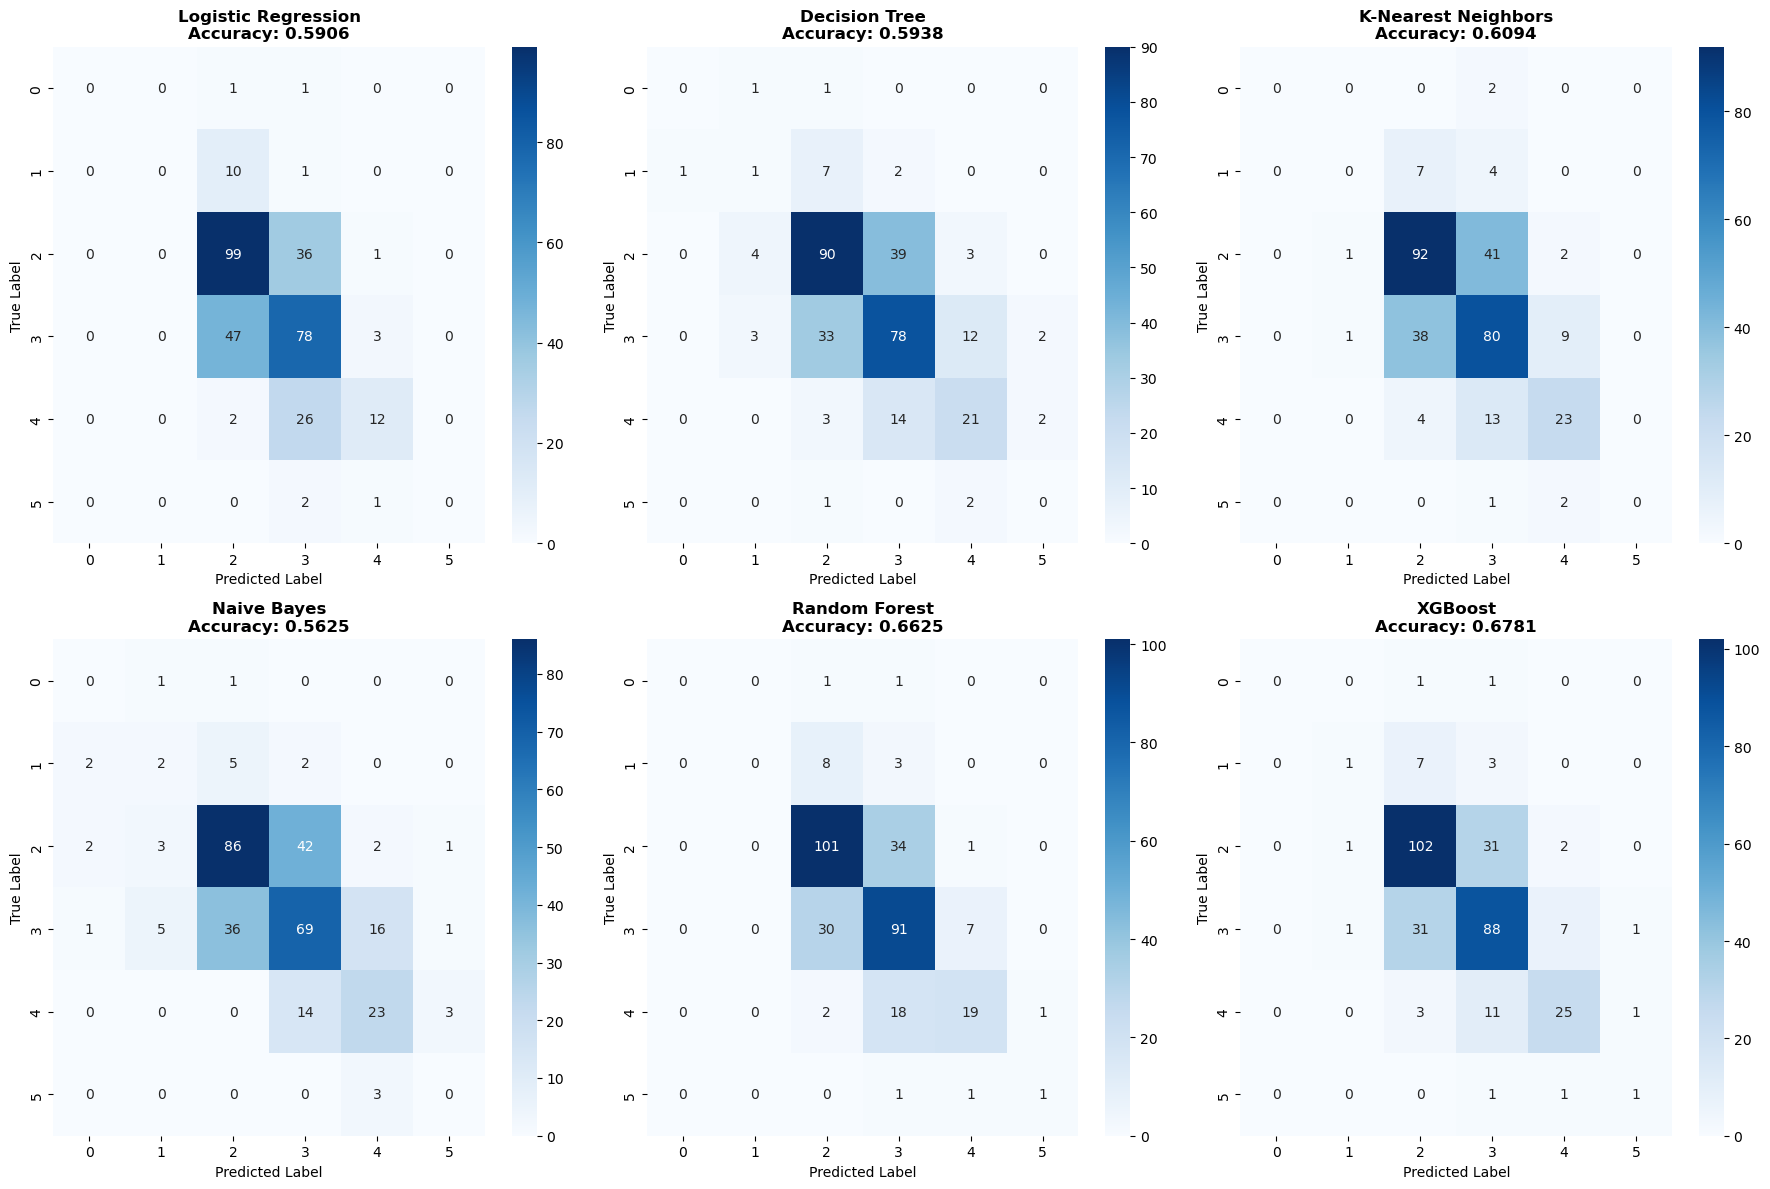

Confusion matrices saved to: ../output\confusion_matrices.png


In [11]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (model_name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(
        f'{model_name}\nAccuracy: {results[model_name]["Accuracy"]:.4f}',
        fontweight='bold'
    )
    axes[idx].set_xlabel('Predicted Label')
    axes[idx].set_ylabel('True Label')

plt.tight_layout()
cm_path = os.path.join(OUTPUT_DIR, 'confusion_matrices.png')
plt.savefig(cm_path, dpi=150, bbox_inches='tight')
plt.show()
print(f"Confusion matrices saved to: {cm_path}")

## 12. Model Performance Comparison Chart

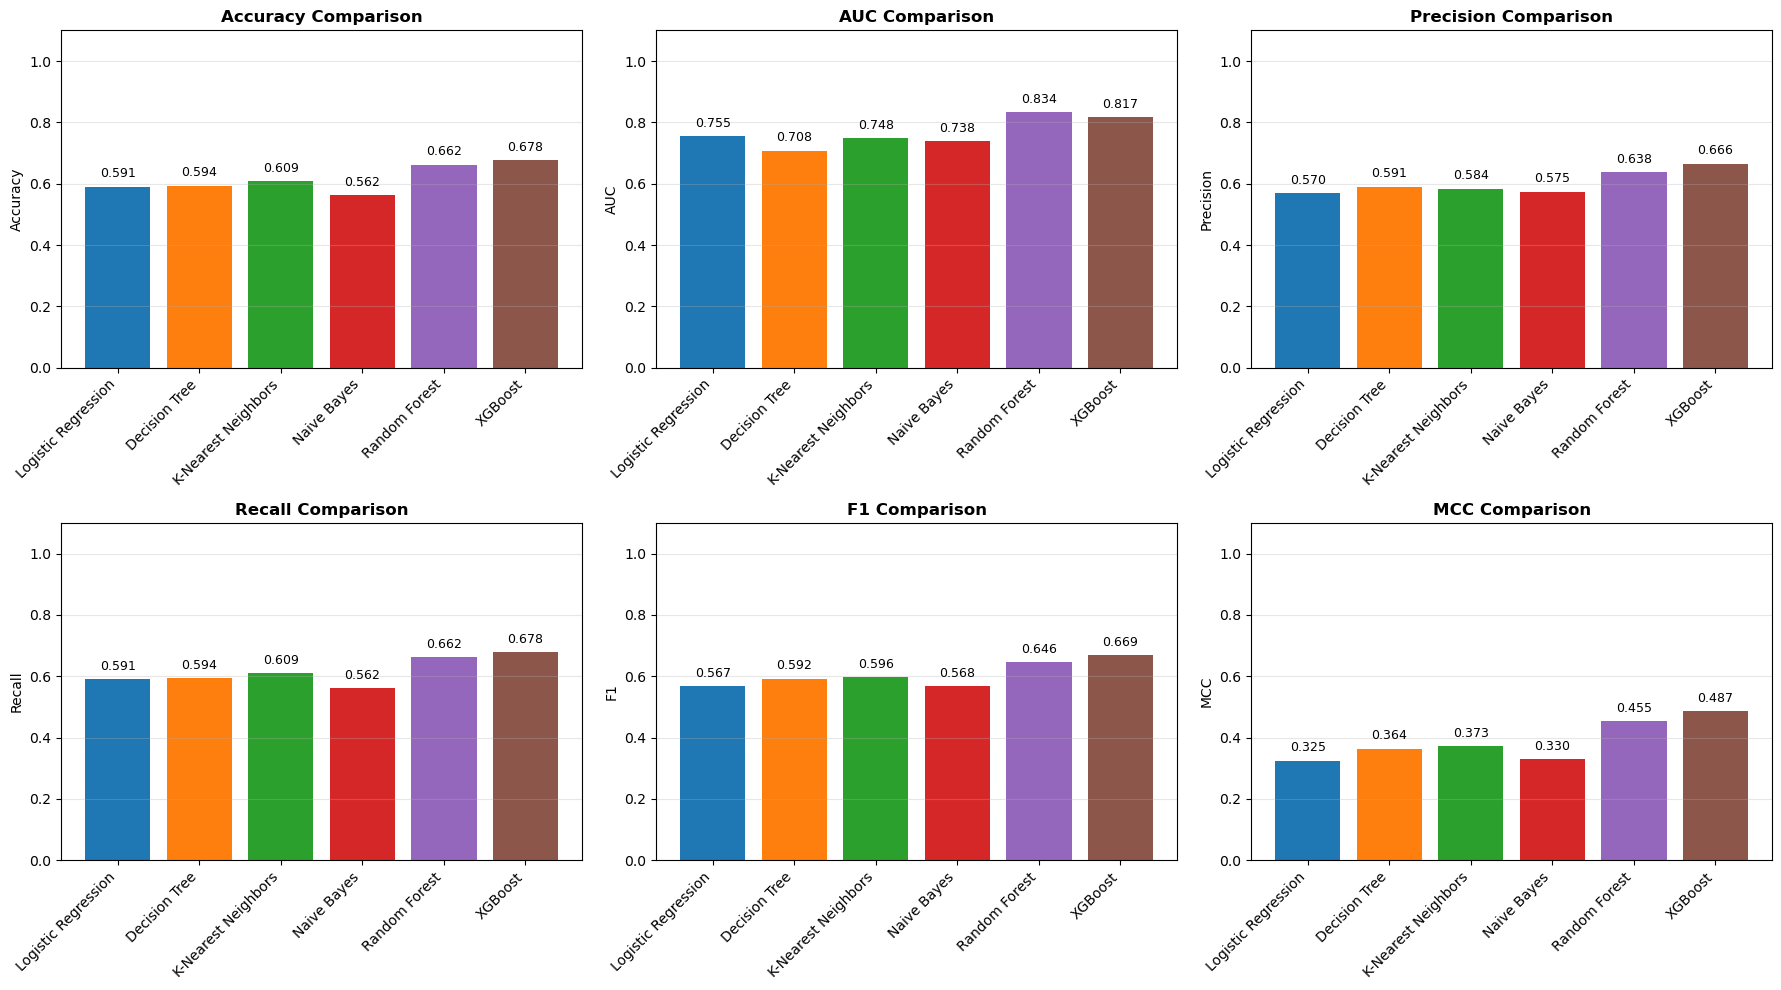

Metrics comparison chart saved to: ../output\metrics_comparison.png


In [12]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

metrics_list = ['Accuracy', 'AUC', 'Precision', 'Recall', 'F1', 'MCC']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

for idx, metric in enumerate(metrics_list):
    metric_values = results_df[metric]
    axes[idx].bar(range(len(metric_values)), metric_values, color=colors)
    axes[idx].set_xticks(range(len(metric_values)))
    axes[idx].set_xticklabels(results_df.index, rotation=45, ha='right')
    axes[idx].set_title(f'{metric} Comparison', fontweight='bold', fontsize=12)
    axes[idx].set_ylabel(metric)
    axes[idx].set_ylim([0, 1.1])
    axes[idx].grid(axis='y', alpha=0.3)
    for i, v in enumerate(metric_values):
        axes[idx].text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
mc_path = os.path.join(OUTPUT_DIR, 'metrics_comparison.png')
plt.savefig(mc_path, dpi=150, bbox_inches='tight')
plt.show()
print(f"Metrics comparison chart saved to: {mc_path}")

## 13. Summary and Conclusion

In [13]:
print(f"Dataset: {df.shape[0]} instances, {df.shape[1]-1} features")
print(f"Best model: {best_model} (Accuracy: {best_accuracy:.4f})")
print("Results saved to CSV. Visualizations generated.")

Dataset: 1599 instances, 11 features
Best model: XGBoost (Accuracy: 0.6781)
Results saved to CSV. Visualizations generated.
